# **Htet Wai Aung**

**The Sparks Foundation: Data Science & Business Analytics Internship**

Task1 : Prediction Using Supervised ML

 Description : To predict the percentage of marks that a student is expected to score based on the number of hours he/she studies.

**Importing necessary libraries and reading data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Imported data successfully!")

Imported data successfully!


In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the scores**

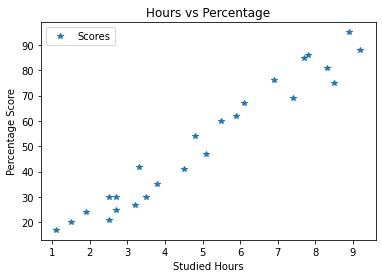

In [7]:
data.plot(x = 'Hours', y = 'Scores', style = '*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Studied Hours')  
plt.ylabel('Percentage Score')  
plt.show()

**Data Preparation**

In [8]:
X = data.iloc[: , : -1].values
y = data.iloc[: , 1].values

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [10]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [11]:
y_test

array([20, 27, 69, 30, 62])

**Training the Data**

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Training completed.")

Training completed.


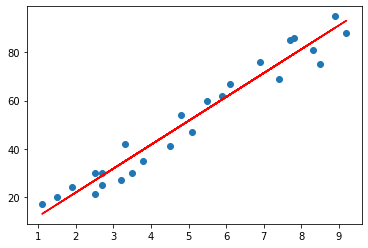

In [13]:
# line plotting
line = model.coef_*X + model.intercept_

# Plotting the test data
plt.scatter(X, y)
plt.plot(X, line, 'r');
plt.show()

Data Prediction 

In [14]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
# Comparison of actual and predicted values

df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Score Prediction of a student who studies 9.25 hrs/day**

In [16]:
hours = 9.25
pred = model.predict([[hours]])
print("No of studied hours = {}".format(hours))
print("Predicted scores = {}".format(pred[0]))

No of studied hours = 9.25
Predicted scores = 93.69173248737539


**Model Evaluation**

In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
